### TEST DETR MODEL 100 EPOCH.

Load model

In [2]:
from transformers import DetrImageProcessor, DetrForObjectDetection
import torch
import cv2
import os

In [3]:
model = DetrForObjectDetection.from_pretrained("Komet/my-fruit-detection-2", ignore_mismatched_sizes=True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
processor = DetrImageProcessor.from_pretrained("Komet/my-fruit-detection-2", ignore_mismatched_sizes=True)
print('Done!')

Done!


In [4]:
import matplotlib.pyplot as plt

# colors for visualization
COLORS = [[0.000, 0.447, 0.741], [0.850, 0.325, 0.098], [0.929, 0.694, 0.125]]

def plot_results(pil_img, scores, labels, boxes):

    # Define the label-to-class mapping
    label2class = {
        1: "apple",
        2: "banana",
        3: "orange"
    }
    plt.figure(figsize=(16,10))
    plt.imshow(pil_img)
    ax = plt.gca()
    colors = COLORS * 100
    for score, label, (xmin, ymin, xmax, ymax),c  in zip(scores.tolist(), labels.tolist(), boxes.tolist(), colors):
        ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                   fill=False, color=c, linewidth=3))
        class_name = label2class.get(label, f'Class {label}')
        print(class_name)
        text = f'{class_name}: {score:0.2f}'
        ax.text(xmin, ymin, text, fontsize=15,
                bbox=dict(facecolor='yellow', alpha=0.5))
    plt.axis('off')
    plt.show()

banana
banana
banana
banana


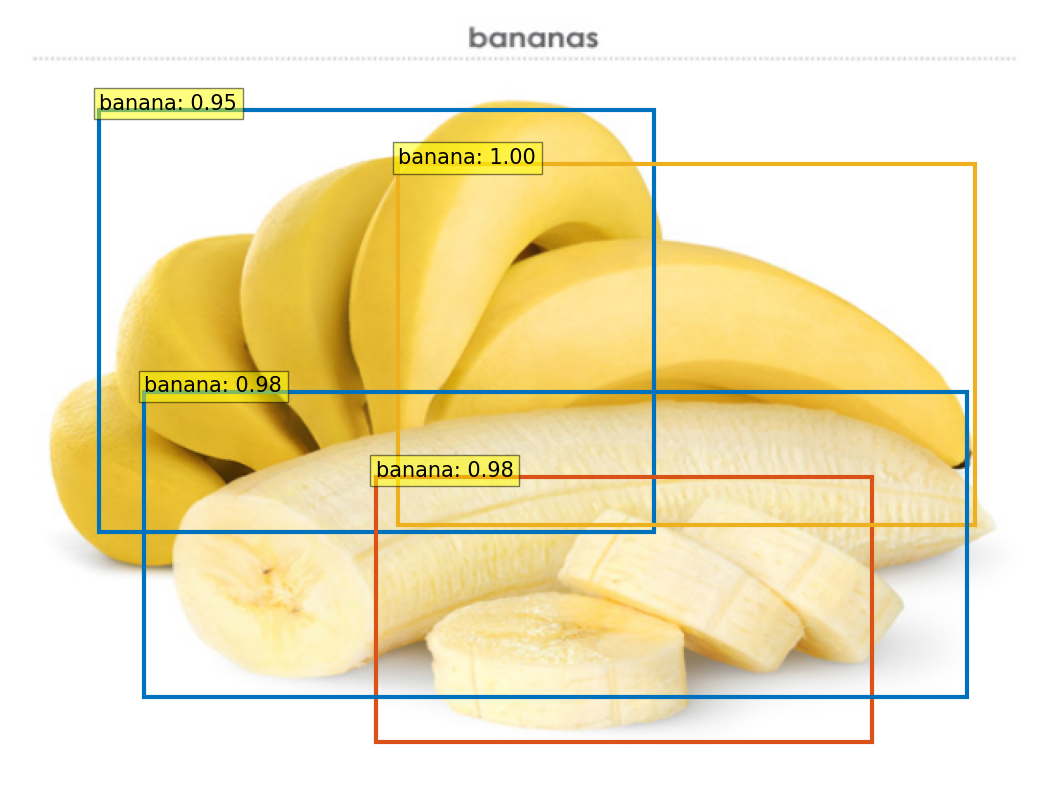

banana


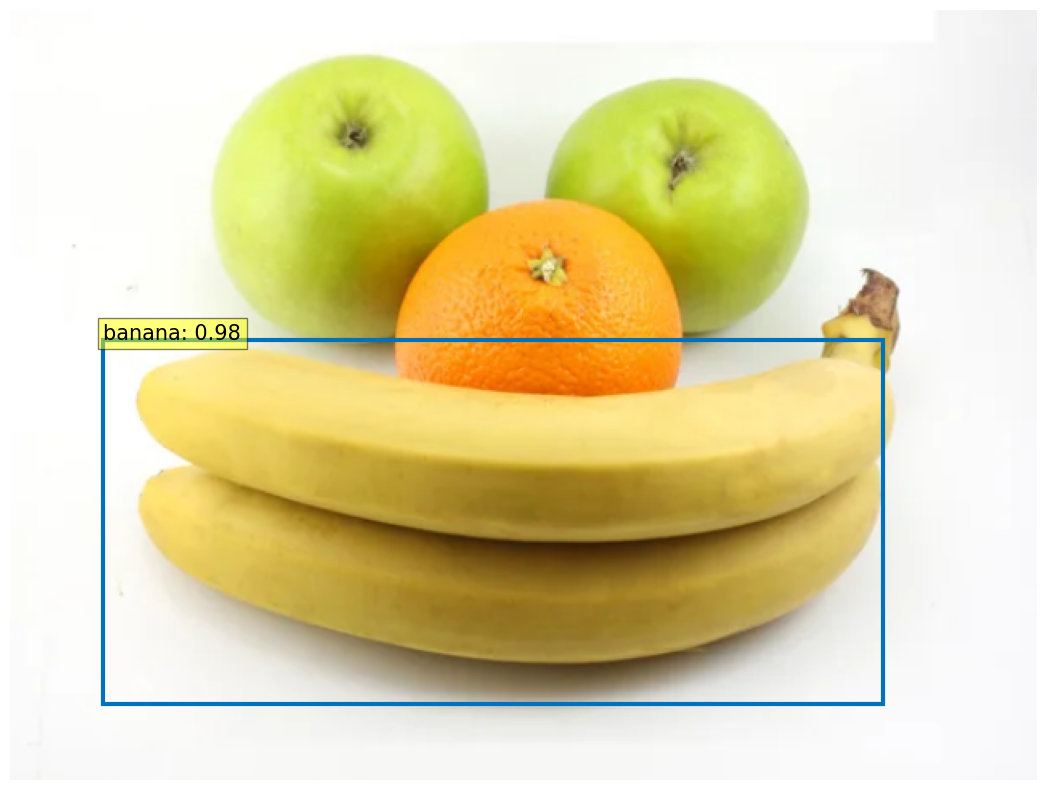

In [5]:
# Define the path to the image you want to test
image_folder = "../pic/"  # Replace with the actual path to your image folder

for filename in os.listdir(image_folder):
    if filename.endswith(".png"):
        # Construct the full path to the image
        image_path = os.path.join(image_folder, filename)

        # Load the image
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (640, 480))

        # Annotate detections
        with torch.no_grad():
            # Load image and predict
            inputs = processor(images=image, return_tensors='pt').to(device)
            outputs = model(**inputs)

            # Post-process
            width, height = 640, 480
            postprocessed_outputs = processor.post_process_object_detection(outputs,
                                                                         target_sizes=[(height, width)],
                                                                         threshold=0.9)

        results = postprocessed_outputs[0]
        plot_results(image, results['scores'], results['labels'], results['boxes'])